## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [54]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Visualiza el DataFrame
df = pd.read_csv("gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.PassengerId.values.reshape(-1,1),df.Survived.values, random_state=11)

In [11]:
X_train.shape

(313, 1)

In [12]:
X_test.shape

(105, 1)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reglin = LinearRegression()

In [15]:
reglin.fit(X=X_train,y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
reglin.coef_ #m

array([-0.00011536])

In [17]:
reglin.intercept_ #b

np.float64(0.48414061903431527)

In [18]:
prediccion = reglin.predict(X_test)

In [19]:
esperado = y_test

In [20]:
for p,e in zip (prediccion[::100],esperado[::100]):
    print(f'Esperado:{e:.2f}, Predicción:{p:.2f}')

Esperado:1.00, Predicción:0.35
Esperado:0.00, Predicción:0.38


In [21]:


predice = lambda x: reglin.coef_*x+reglin.intercept_

predice(20)


array([0.48183344])

In [38]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [26]:
metrics.r2_score(esperado,prediccion) #60% (Esta muy bien)


-0.00287245936866265

In [27]:
metrics.mean_squared_error(esperado,prediccion) # Cuanto más se acerque a 0, menos errores hay

0.2365050697830859

In [28]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [29]:
model_lasso = Lasso()
model_ridge = Ridge()
model_elastic = ElasticNet()

In [31]:
model_lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
model_ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [32]:
model_elastic.fit(X_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [33]:
# Hacemos predicciones
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)

# Calculamos R²
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

In [34]:
print(f"Lasso R²: {r2_lasso:.2%}")
print(f"Ridge R²: {r2_ridge:.2%}")
print(f"ElasticNet R²: {r2_elastic:.2%}")

Lasso R²: -0.23%
Ridge R²: -0.29%
ElasticNet R²: -0.25%


In [56]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters = 2, random_state = 11) #El nº de grupos que se con anterioridad que hay

In [68]:
kmeans.fit(df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components = 2, random_state = 11)

In [71]:
pca.fit(df)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,11


In [72]:
df_pca = pca.transform(df)

In [73]:
df_pca.shape

(418, 2)

In [74]:
df_pca_df = pd.DataFrame(df_pca, columns = ["Componente1","Componente2"])

In [76]:
df_pca_df["Survived"] = df.Survived

In [78]:
df_pca_df.head()

,Componente1,Componente2,Survived
0,-208.499965,-0.382958,0
1,-207.500058,0.617135,1
2,-206.499965,-0.382773,0
3,-205.499965,-0.382680,0
4,-204.500058,0.617413,1


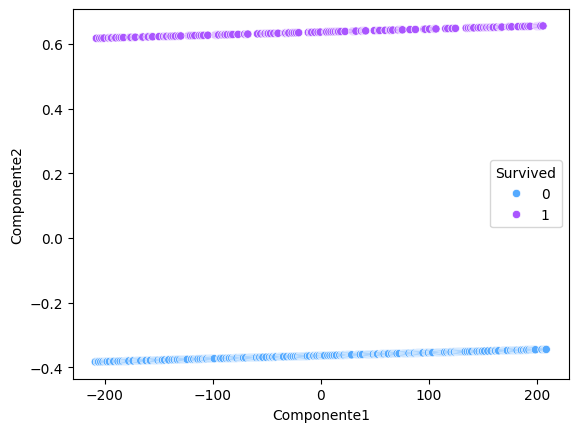

In [79]:
axes = sns.scatterplot(data = df_pca_df, x = "Componente1", y = "Componente2", hue = "Survived", legend = "brief", palette = "cool")

In [80]:
Survived_centros = pca.transform(kmeans.cluster_centers_) #Los centros de los cluster

c:\Users\Techie10\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [81]:
import matplotlib.pyplot as plt

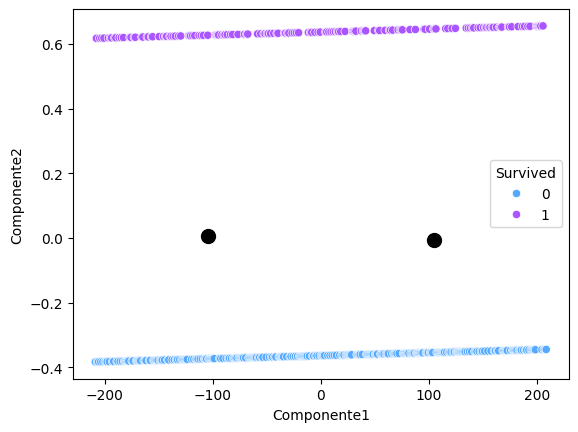

In [ ]:
axes = sns.scatterplot(data = df_pca_df, x = "Componente1", y = "Componente2", hue = "Survived", legend = "brief", palette = "cool")

dots = plt.scatter(Survived_centros[:,0], Survived_centros[:,1], s = 100, c = "k") #s-Tamaño, c-Color